<a href="https://colab.research.google.com/github/yohanaaritonang/predicting-employees-performance-with-apriori-algorithm/blob/main/Exploratory-Data-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving employee.csv to employee.csv


In [ ]:
#mengimpor file berupa csv
import io
%time data = pd.read_csv(io.BytesIO(uploaded['employee.csv']), delimiter=',', index_col=0)

CPU times: user 92.7 ms, sys: 22.2 ms, total: 115 ms
Wall time: 132 ms


In [ ]:
data.sample(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
31898,Technology,region_7,Bachelor's,male,sourcing,1,37,Excellent,7,Yes,No,81,No
41586,Operations,region_4,Master's & above,male,other,1,36,Outstanding,9,No,No,59,No
42678,Operations,region_31,Bachelor's,female,other,1,26,Excellent,3,No,No,62,No
31697,Procurement,region_24,Bachelor's,male,other,1,31,Low,2,No,No,70,No
26129,Sales & Marketing,region_22,Bachelor's,male,referred,1,29,Great,2,Yes,No,55,Yes


In [ ]:
data.describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,5.865512,63.386750
std,0.609264,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


In [ ]:
#memeriksa missing value

round (data.isnull().sum()/ len(data) * 100, 4)

department             0.0000
region                 0.0000
education              4.3953
gender                 0.0000
recruitment_channel    0.0000
no_of_trainings        0.0000
age                    0.0000
performance_rating     7.5244
length_of_service      0.0000
KPIs_met >80%          0.0000
awards_won?            0.0000
avg_training_score     0.0000
is_promoted            0.0000
dtype: float64

## SEABORN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [ ]:
# standard import statement for seaborn
import seaborn as sns

In [ ]:
employee = pd.read_csv(io.StringIO(uploaded['employee.csv'].decode('utf-8'))) 

In [ ]:
employee.shape

(54808, 14)

In [ ]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   employee_id          54808 non-null  int64 
 1   department           54808 non-null  object
 2   region               54808 non-null  object
 3   education            52399 non-null  object
 4   gender               54808 non-null  object
 5   recruitment_channel  54808 non-null  object
 6   no_of_trainings      54808 non-null  int64 
 7   age                  54808 non-null  int64 
 8   performance_rating   50684 non-null  object
 9   length_of_service    54808 non-null  int64 
 10  KPIs_met >80%        54808 non-null  object
 11  awards_won?          54808 non-null  object
 12  avg_training_score   54808 non-null  int64 
 13  is_promoted          54808 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.9+ MB


## Menganalisis Variabel secara Individual

In [ ]:
numerical_vars = ['no_of_trainings', 'age', 
                 'length_of_service', 'avg_training_score']
categorical_vars = ['department', 'region', 'education', 'gender', 'recruitment_channel',
                   'performance_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted']

In [ ]:
employee = employee[numerical_vars + categorical_vars]
employee.shape

(54808, 13)

## Memahami Variabel Utama

In [ ]:
employee['performance_rating'].describe()

count     50684
unique        5
top       Great
freq      18618
Name: performance_rating, dtype: object

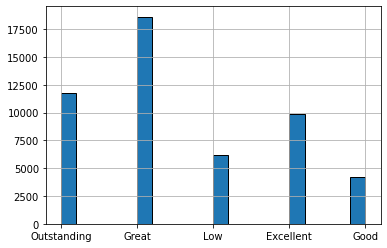

In [ ]:
employee['performance_rating'].hist(edgecolor='black', bins=20);

In [ ]:
print("Skewness: {:0.3f}".format(employee['length_of_service'].skew()))
print("Kurtosis: {:0.3f}".format(employee['length_of_service'].kurt()))

Skewness: 1.738
Kurtosis: 4.414


# Variabel Numerika

In [ ]:
employee[numerical_vars].describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,5.865512,63.386750
std,0.609264,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


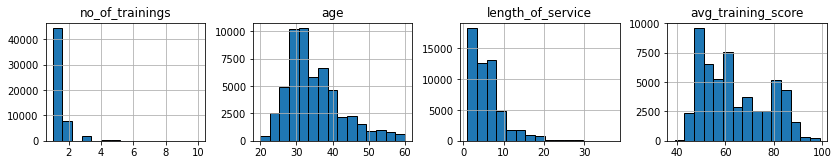

In [ ]:
employee[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

In [ ]:
employee['age_start_of_service'] = employee['age'] - employee['length_of_service']

In [ ]:
employee['age_start_of_service']

0        27
1        26
2        27
3        29
4        43
         ..
54803    31
54804    31
54805    24
54806    27
54807    22
Name: age_start_of_service, Length: 54808, dtype: int64

In [ ]:
numerical_vars.append('age_start_of_service')

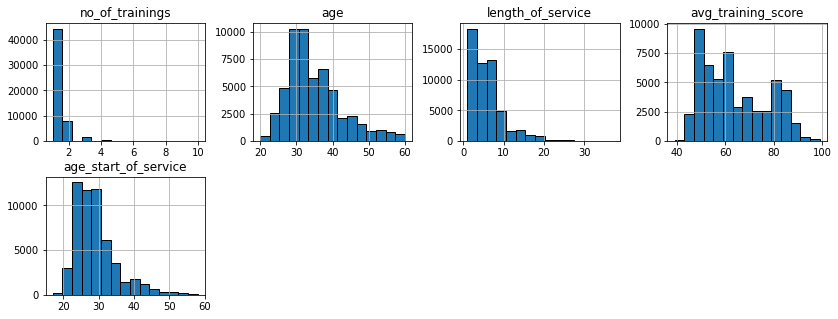

In [ ]:
employee[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14,5), layout = (2,4));

# Variabel Kategorikal

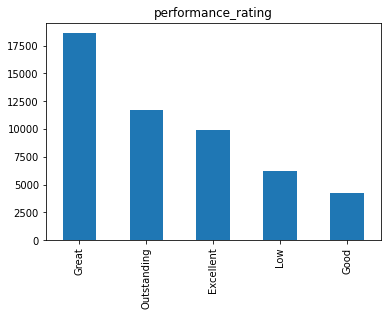

In [ ]:
employee['performance_rating'].value_counts().plot(kind='bar', title='performance_rating');

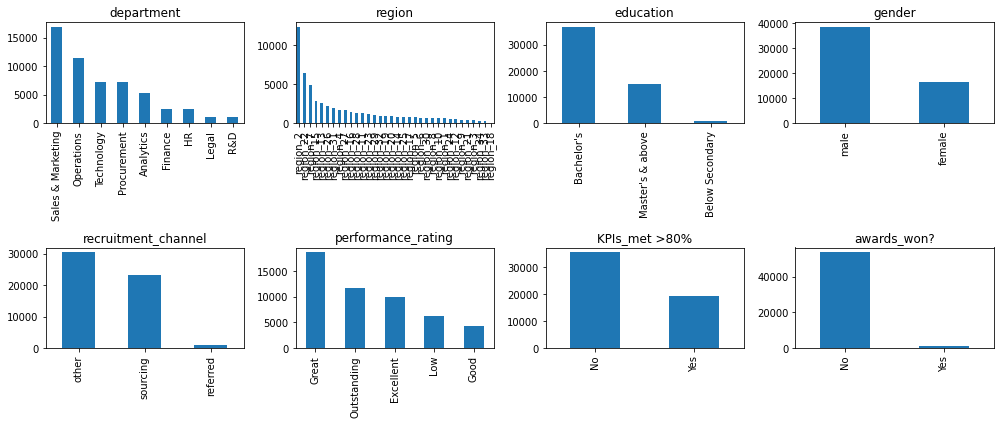

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    employee[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
    fig.tight_layout()

In [ ]:
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [ ]:
levels_to_keep = employee[categorical_vars].apply(identify_cat_above30, axis=0)
levels_to_keep

department             [Sales & Marketing, Operations, Technology, Pr...
region                 [region_2, region_22, region_7, region_15, reg...
education                [Bachelor's, Master's & above, Below Secondary]
gender                                                    [male, female]
recruitment_channel                          [other, sourcing, referred]
performance_rating            [Great, Outstanding, Excellent, Low, Good]
KPIs_met >80%                                                  [No, Yes]
awards_won?                                                    [No, Yes]
is_promoted                                                    [No, Yes]
dtype: object

In [ ]:
for var in categorical_vars:
    employee = employee.loc[employee[var].isin(levels_to_keep[var])]

In [ ]:
employee.shape

(48660, 14)

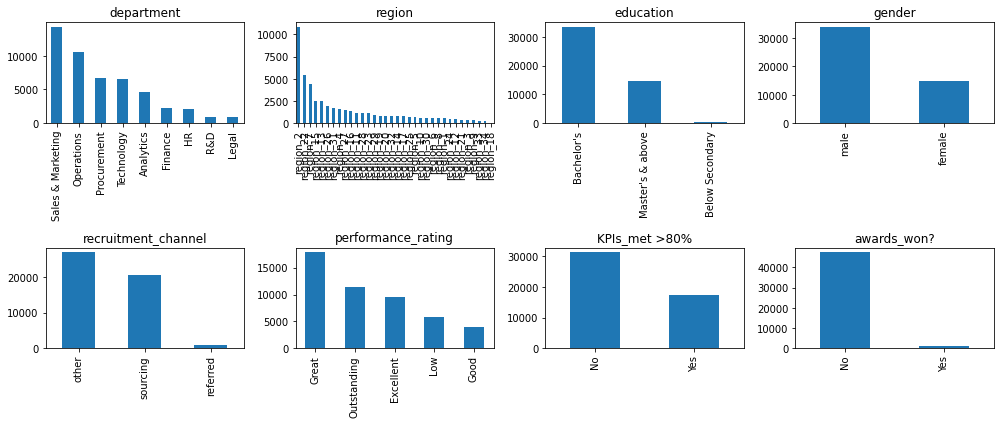

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    employee[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
    fig.tight_layout()

## Hubungan Antara Variabel dengan Scatter Plot

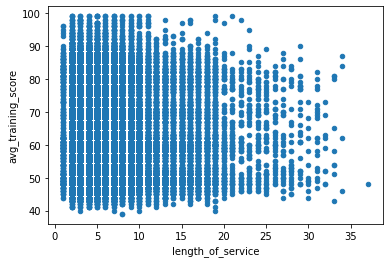

In [ ]:
employee.plot.scatter(x='length_of_service', y='avg_training_score');

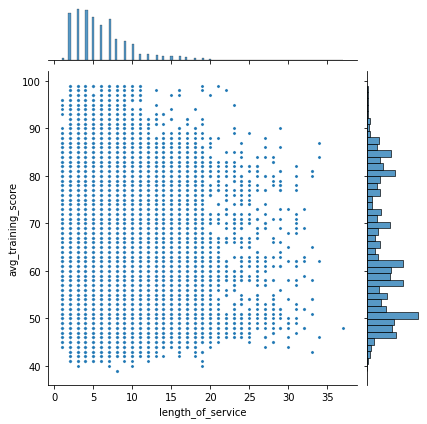

In [ ]:
sns.jointplot(x='length_of_service', y='avg_training_score', data=employee, joint_kws={"s": 10});

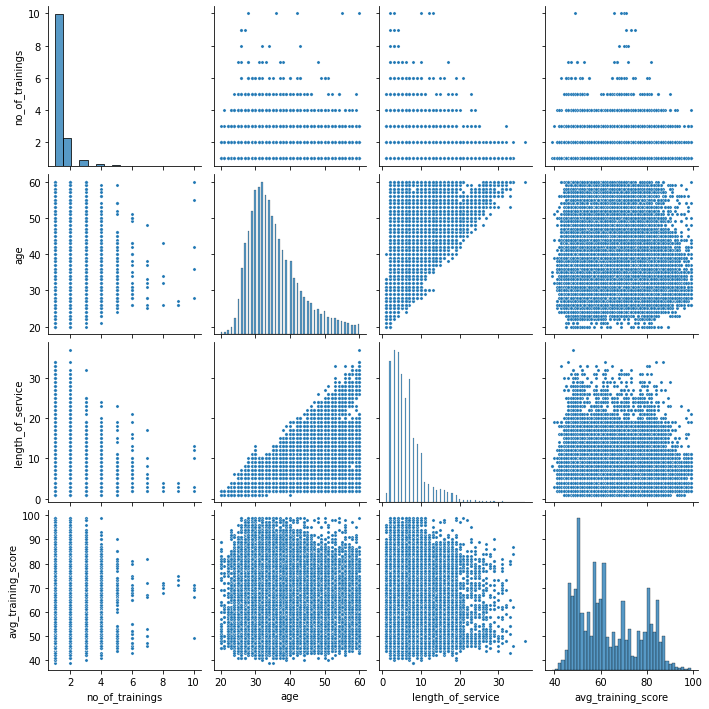

In [ ]:
sns.pairplot(employee[numerical_vars[:4]], plot_kws={"s": 10});

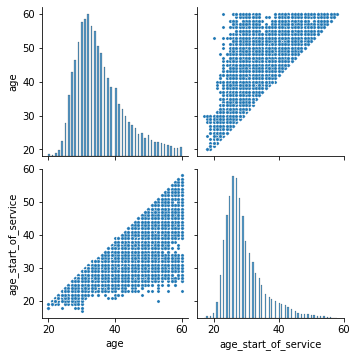

In [ ]:
sns.pairplot(employee[['age']+numerical_vars[4:]], plot_kws={"s": 10});

In [ ]:
employee[numerical_vars].corr()

,no_of_trainings,age,length_of_service,avg_training_score,age_start_of_service
no_of_trainings,1.000000,-0.083590,-0.055440,0.042033,-0.066918
age,-0.083590,1.000000,0.620348,-0.066214,0.830974
length_of_service,-0.055440,0.620348,1.000000,-0.047461,0.079164
avg_training_score,0.042033,-0.066214,-0.047461,1.000000,-0.050493
age_start_of_service,-0.066918,0.830974,0.079164,-0.050493,1.000000


In [ ]:
employee[numerical_vars].corr()['age'].sort_values(ascending=False)

age                     1.000000
age_start_of_service    0.830974
length_of_service       0.620348
avg_training_score     -0.066214
no_of_trainings        -0.083590
Name: age, dtype: float64

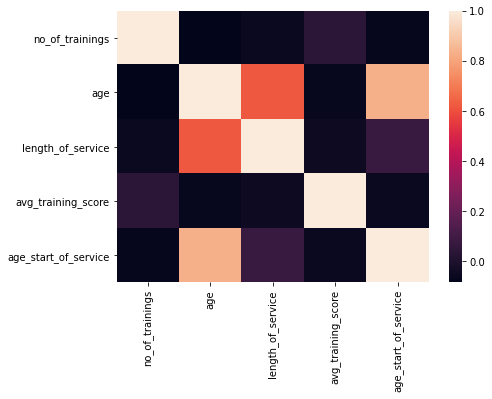

In [ ]:
correlations = employee[numerical_vars].corr()
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);

## Hubungan Antara Variabel dengan Scatter Plot

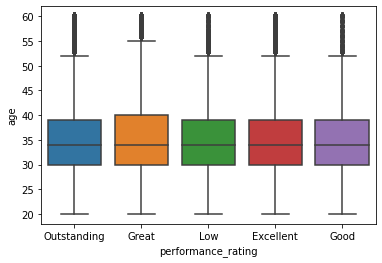

In [ ]:
sns.boxplot(x='performance_rating', y='age', data=employee);

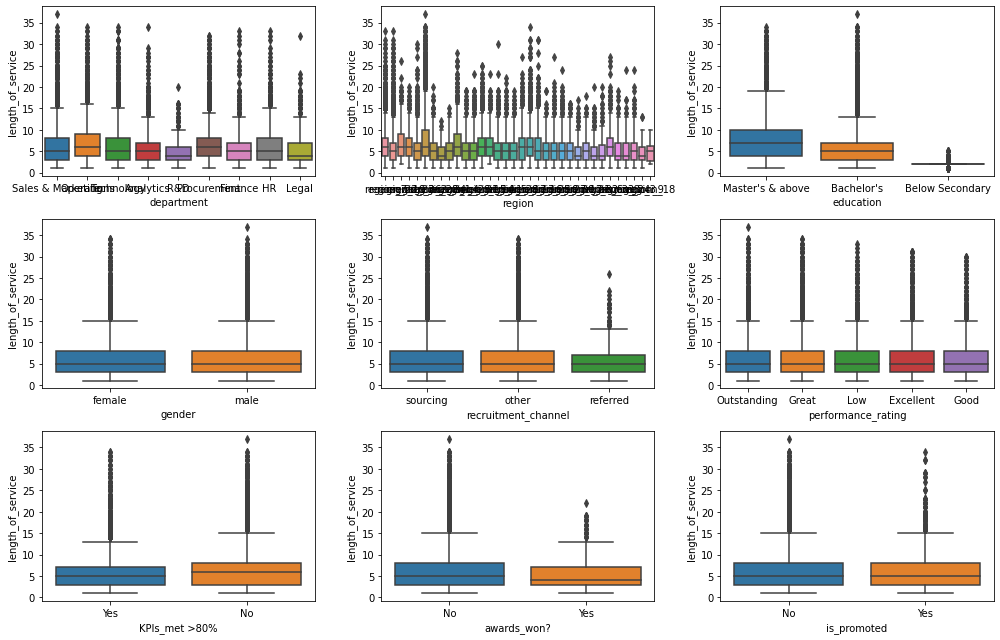

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='length_of_service', data=employee, ax=subplot)
    
    fig.tight_layout()

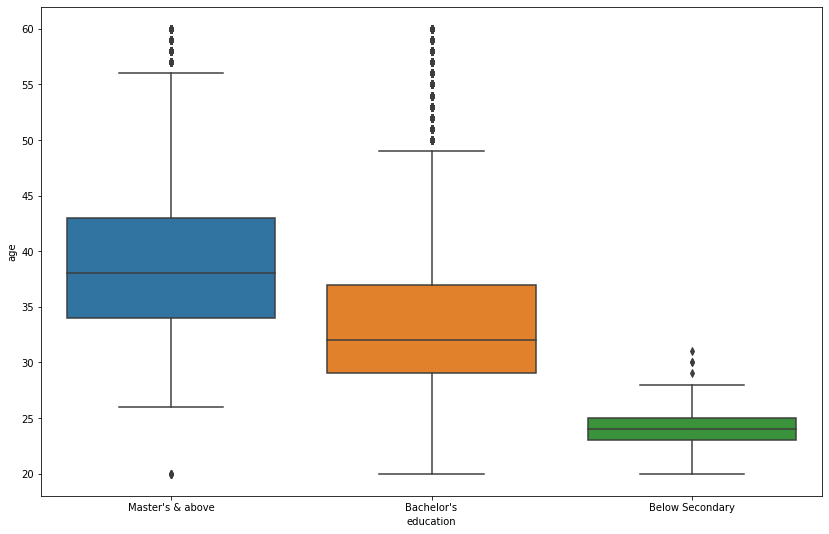

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
sns.boxplot(x='education', y='age', data=employee,ax=ax);

In [ ]:
sorted_nb = employee.groupby('education')['age'].median().sort_values().index.values

In [ ]:
sorted_nb

array(['Below Secondary', "Bachelor's", "Master's & above"], dtype=object)

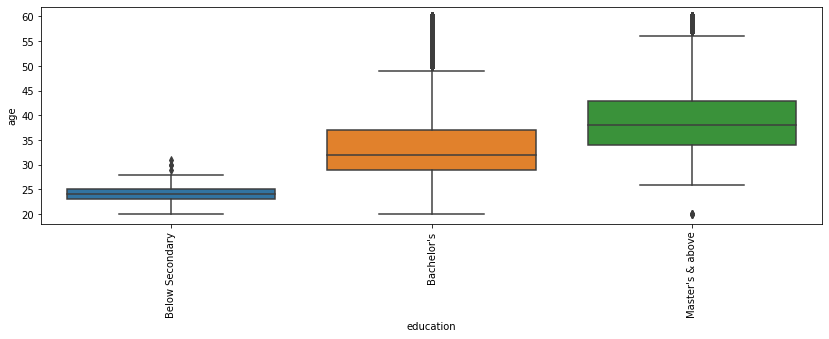

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='education', y='age', data=employee, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

## Hubungan Antara Variabel dengan Complex Conditional Plots

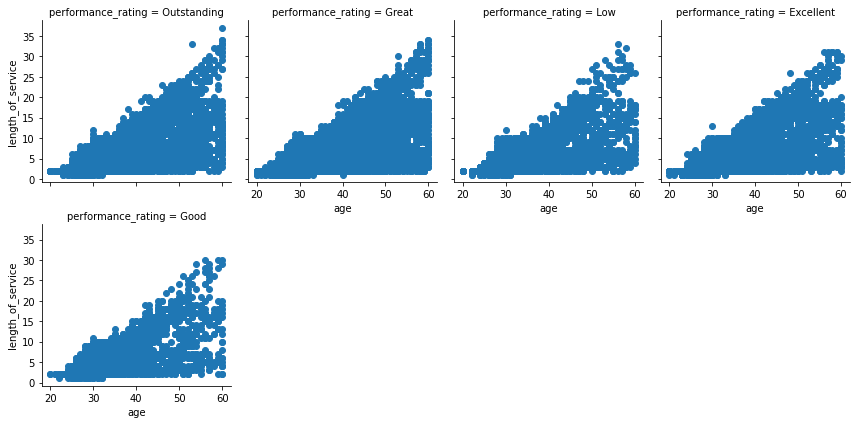

In [ ]:
conditional_plot = sns.FacetGrid(employee, col="performance_rating", col_wrap=4)
conditional_plot.map(plt.scatter, "age", "length_of_service");